# Описание проекта
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


In [47]:
# импортируем библиотеки и откроем файл

import pandas as pd 
import numpy as np
try:
    data = pd.read_csv(r"C:\Users\Пользователь\Documents\Data Analyst\СПРИНТ 4\real_estate_data.csv", sep='\t')
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')
data.info()
display(data.head(10))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,NaN,...,25,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,19,1,NaN,...,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,NaN,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,...,41,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30,2018-09-10T00:00:00,1,NaN,12,14,5,NaN,...,9,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,3700000,37,2017-11-02T00:00:00,1,NaN,26,11,6,NaN,...,14,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155
7,5,7915000,72,2019-04-18T00:00:00,2,NaN,24,NaN,22,NaN,...,19,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN
8,20,2900000,33,2018-05-23T00:00:00,1,NaN,27,15,26,NaN,...,9,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,18,5400000,61,2017-02-26T00:00:00,3,2,9,44,7,NaN,...,6,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289


Из полученной информации видим, что есть пропущенные данные в нескольких столбцах
есть также ошибки в типе данных, например is_appartment должен быть булев тип, а указан object
а first_day_exposition должен иметь тип datetime64, а не object

## Этап 2. Предобработка данных
1.	Определим и изучим пропущенные значения:
	
	
2.	Приведем данные к нужным типам:
	


In [48]:
# избавимся от явных дубликатов
data_duplicated = data[data.duplicated()].head()
display(data_duplicated)
data = data.drop_duplicates()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [49]:
# наведем порядое в типах данных
data['floors_total'] = data['floors_total'].astype('Int64').round()
data['is_apartment'] = data['is_apartment'].astype('bool')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64').round()
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64').round()
data['days_exposition'] = data['days_exposition'].round().astype('Int64')
data ['first_day_exposition'] =pd.to_datetime(data ['first_day_exposition'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [50]:
# в датафрейме есть Заглавные буквы. Приведем все к строчным.
data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})


In [51]:
# найдем пропущенные значения и прсчитаем их сумму

ceiling_height_nan = data['ceiling_height'].isna().sum()
floors_total_nan = data['floors_total'].isna().sum()
living_area_nan = data['living_area'].isna().sum()
is_apartment_nan = data['is_apartment'].isna().sum()
living_area_nan = data['living_area'].isna().sum()
kitchen_area_nan = data['kitchen_area'].isna().sum()
balcony_nan = data['balcony'].isna().sum()
kitchen_area_nan = data['kitchen_area'].isna().sum()
locality_name_nan = data['locality_name'].isna().sum()
airports_nearest_nan = data['airports_nearest'].isna().sum()
citycenters_nearest_nan = data['citycenters_nearest'].isna().sum()
parks_around3000_nan = data['parks_around3000'].isna().sum()
parks_nearest_nan = data['parks_nearest'].isna().sum()
ponds_nearest_nan = data['ponds_nearest'].isna().sum()
ponds__around3000_nan = data['ponds_around3000'].isna().sum()
days_exposition_nan = data['days_exposition'].isna().sum()

# выведем на экран количество пропусков и их процент
print('ceiling_height_nan:', ceiling_height_nan, ':', ceiling_height_nan/23699 *100, '%') 
print('floors_total_nan:', floors_total_nan, ':', floors_total_nan/23699*100, '%')
print('living_area_nan:', living_area_nan, ':', living_area_nan/23699*100, '%') 
print('is_apartment_nan:', is_apartment_nan, ':', is_apartment_nan/23699*100, '%')
print('living_area_nan:', living_area_nan, ':', living_area_nan/23699*100, '%') 
print('kitchen_area_nan:', kitchen_area_nan, ':', kitchen_area_nan/23699*100, '%') 
print('balcony_nan:', balcony_nan, ':', balcony_nan/23699*100, '%') 
print('locality_name_nan:', locality_name_nan, ':', locality_name_nan/23699*100, '%')
print('airports_nearest_nan:', airports_nearest_nan, ':', ceiling_height_nan/23699*100, '%') 
print('citycenters_nearest_nan:', citycenters_nearest_nan, ':', citycenters_nearest_nan/23699*100, '%')
print('parks_around3000_nan:', parks_around3000_nan, ':', parks_around3000_nan/23699*100, '%')
print('parks_nearest_nan:', parks_nearest_nan, ':', parks_nearest_nan/23699*100, '%')
print('ponds_nearest_nan:', ponds_nearest_nan, ':', ponds_nearest_nan/23699*100, '%')
print('ponds__around3000_nan:', ponds__around3000_nan, ':', ponds__around3000_nan/23699*100, '%')
print('days_exposition_nan:', days_exposition_nan, ':', days_exposition_nan/23699*100, '%')



ceiling_height_nan: 9195 : 38.799105447487236 %
floors_total_nan: 86 : 0.36288450989493226 %
living_area_nan: 1903 : 8.029874678256467 %
is_apartment_nan: 0 : 0.0 %
living_area_nan: 1903 : 8.029874678256467 %
kitchen_area_nan: 2278 : 9.612219924891345 %
balcony_nan: 11519 : 48.605426389299126 %
locality_name_nan: 49 : 0.20675977889362418 %
airports_nearest_nan: 5542 : 38.799105447487236 %
citycenters_nearest_nan: 5519 : 23.28790244314106 %
parks_around3000_nan: 5518 : 23.2836828558167 %
parks_nearest_nan: 15620 : 65.90995400649817 %
ponds_nearest_nan: 14589 : 61.55955947508333 %
ponds__around3000_nan: 5518 : 23.2836828558167 %
days_exposition_nan: 3181 : 13.422507278788135 %


In [52]:
#заменим пропуски в столбце balcony значением 0, так как пропуски в этом столбце скорее всего ознгачают,что балконов нет.
data['balcony'] = data['balcony'].fillna(0)

# выведем список уникальных значений,чтоб убедиться, что мы избавились от NaN
print(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64


In [53]:
# аналогичная ситуация с парками и прудами в радиусе 3000 м.Также заменим пропуски на 0, что значит,что их скорее всего нет.
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data['parks_around3000'].value_counts())
print(data['ponds_around3000'].value_counts())


0    15624
1     5681
2     1747
3      647
Name: parks_around3000, dtype: Int64
0    14589
1     5717
2     1892
3     1501
Name: ponds_around3000, dtype: Int64


In [54]:
# количество пропусков в locality_name очень мало, всего 0,2%. Удаление всех строк не приведет к потери цунных данных. 
data = data.dropna(subset=['locality_name'])
# аналогичная ситуация с floors_total. % пропусков очень мал.
data = data.dropna(subset=['floors_total'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [55]:
# найдем средние величины высоты потолка,сгруппировав датафрейм по этажности домов.
ceiling_height_mean = data.groupby('floors_total')['ceiling_height'].mean()

# проверим уникальные знчения в столбце этажности домов
print(data['floors_total'].value_counts())

# посмотрим на все значения в столбце высоты потолков
print(data['ceiling_height'].value_counts())
print(data['ceiling_height'].max())
ceiling_height_mean

5     5775
9     3758
16    1375
12    1361
4     1193
10    1174
25    1075
6      910
17     833
3      667
7      589
14     553
18     505
24     462
8      388
2      381
15     365
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: Int64
2    3515
3    1645
3    1571
3    1108
3     988
     ... 
5       1
2       1
2       1
4       1
4       1
Name: ceiling_height, Length: 183, dtype: int64
100.0


floors_total
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
33   NaN
34     3
35     3
36    15
37     2
52     3
60     3
Name: ceiling_height, dtype: float64

In [56]:
#  проверим в домах какой этажности есть пропуски в столбце высота потолков

total_floors_ceil = data[data['ceiling_height'].isna()]
#display (total_floors_ceil_groupped.head(10))
total_floors_ceil_groupped = total_floors_ceil.groupby('floors_total')['floors_total'].sum()
display(total_floors_ceil_groupped)

floors_total
1        15
2       336
3       804
4      1624
5     10565
6      1752
7      1344
8      1352
9     10809
10     4240
11     1023
12     6096
13     1456
14     2940
15     2100
16     8176
17     5610
18     4140
19     3895
20     2300
21     1953
22     3190
23     3542
24     5904
25    13800
26     1820
27     2484
28      336
33       33
35      560
36       36
Name: floors_total, dtype: Int64

In [57]:
# теперь заменим пропуски медианными значениями, в зависимости от этажности. Напишем функцию для расчета медианы.

data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))
print(data['ceiling_height'].head(10))

0   3
1   3
2   3
3   3
4   3
5   3
6   3
7   3
8   3
9   2
Name: ceiling_height, dtype: float64


In [58]:
# из таблицы заметили нераеальные значения высоты потолков в домах с этажностью 36 и пропущенные значения в домах с этажностью 33
# изучим эти данные более пристально. 
display(data[data['floors_total']== 36])

# заменим некорректные значения
data.loc[5807, 'ceiling_height'] = 2.7
data.loc[397, 'ceiling_height'] = 2.7 # значение 27 явно опечатка, заменим на 2.7
display(data[data['floors_total']== 36])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000,54,2018-03-22,2,15,36,21,28,True,...,19,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11
5807,17,8150000,80,2019-01-09,2,27,36,41,13,True,...,12,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38
11079,16,9200000,75,2019-02-22,2,3,36,40,29,True,...,12,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000,54,2018-03-22,2,3,36,21,28,True,...,19,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11
5807,17,8150000,80,2019-01-09,2,3,36,41,13,True,...,12,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38
11079,16,9200000,75,2019-02-22,2,3,36,40,29,True,...,12,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>


In [59]:
# посмторим,что не так с 28 этажом
display(data[data['floors_total']== 28])

# найдем медиану высоты потолков для 28 этажных домов
median_floor_28 = data[data['floors_total']== 28]['ceiling_height'].median()
print (median_floor_28)


data.loc[(data['floors_total'] == 28),'ceiling_height'] = data.loc[(data['floors_total'] == 28),'ceiling_height'].fillna(median_floor_28)
display(data[data['floors_total']== 28])




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
324,0,6090000,62,2015-09-06,2,3,28,30,22,True,...,10,1,Санкт-Петербург,19971,21683,0,<NA>,1,546,323
806,3,7520000,68,2017-12-13,2,3,28,36,5,True,...,11,0,Санкт-Петербург,48847,16685,0,<NA>,0,<NA>,<NA>
4558,10,7500000,68,2017-04-26,2,3,28,34,18,False,...,10,0,Санкт-Петербург,20028,21740,0,<NA>,1,400,42
6397,8,9000000,70,2018-09-06,2,2,28,32,12,True,...,13,0,Санкт-Петербург,15916,8180,1,489,2,830,146
7073,15,2990000,37,2017-09-06,1,3,28,16,12,True,...,10,2,посёлок Мурино,NaN,NaN,0,<NA>,0,<NA>,265
7711,12,4799000,60,2017-04-18,2,2,28,31,27,False,...,10,2,посёлок Парголово,53734,19942,0,<NA>,0,<NA>,87
8622,10,2850000,39,2018-07-04,1,3,28,18,3,True,...,10,0,посёлок Мурино,NaN,NaN,0,<NA>,0,<NA>,12
12950,17,5950000,45,2018-02-01,1,2,28,19,18,True,...,13,0,Санкт-Петербург,15916,8180,1,489,2,830,430
14018,10,7200000,80,2019-03-15,3,3,28,46,4,True,...,11,2,посёлок Парголово,53734,19942,0,<NA>,0,<NA>,<NA>
14033,2,5675000,56,2018-02-02,2,3,28,31,13,True,...,9,0,Санкт-Петербург,48847,16685,0,<NA>,0,<NA>,238


2.6


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
324,0,6090000,62,2015-09-06,2,3,28,30,22,True,...,10,1,Санкт-Петербург,19971,21683,0,<NA>,1,546,323
806,3,7520000,68,2017-12-13,2,3,28,36,5,True,...,11,0,Санкт-Петербург,48847,16685,0,<NA>,0,<NA>,<NA>
4558,10,7500000,68,2017-04-26,2,3,28,34,18,False,...,10,0,Санкт-Петербург,20028,21740,0,<NA>,1,400,42
6397,8,9000000,70,2018-09-06,2,2,28,32,12,True,...,13,0,Санкт-Петербург,15916,8180,1,489,2,830,146
7073,15,2990000,37,2017-09-06,1,3,28,16,12,True,...,10,2,посёлок Мурино,NaN,NaN,0,<NA>,0,<NA>,265
7711,12,4799000,60,2017-04-18,2,2,28,31,27,False,...,10,2,посёлок Парголово,53734,19942,0,<NA>,0,<NA>,87
8622,10,2850000,39,2018-07-04,1,3,28,18,3,True,...,10,0,посёлок Мурино,NaN,NaN,0,<NA>,0,<NA>,12
12950,17,5950000,45,2018-02-01,1,2,28,19,18,True,...,13,0,Санкт-Петербург,15916,8180,1,489,2,830,430
14018,10,7200000,80,2019-03-15,3,3,28,46,4,True,...,11,2,посёлок Парголово,53734,19942,0,<NA>,0,<NA>,<NA>
14033,2,5675000,56,2018-02-02,2,3,28,31,13,True,...,9,0,Санкт-Петербург,48847,16685,0,<NA>,0,<NA>,238


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [61]:
# теперь избавимся от пропусков в столбце living_area. здесь возможна корреляция с общей площадью.
# категоризируем данные в столбце с общей площадью на 5 категорий. Найдем медиану для каждой категории и заполним пропуски.

def area_cat (area):
    if area <= 50.00:
        return 'до 50 м2'
    if area <= 100.00 and area >= 50.01:
        return 'от 50 до 100 м2'
    if area <= 150.00 and area >= 100.01:
        return 'от 100 до 150 м2'
    if area >= 150.01 and area <= 200.00:
        return 'от 150 до 200 м2'    
    else:
        return 'свыше 200 м2'
    

data['total_area_category']= data['total_area'].apply(area_cat)


data['living_area'] = data['living_area'].fillna(data.groupby('total_area_category')['living_area'].transform('median'))
print(data['living_area'].count())
display(data[data ['living_area'].isna()])



23565


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


In [62]:
#  в столбце площадь кухни пропусков очень мало. Скорее всего они связаны с отсутствием отдельной кухни в кваритрах-студиях.
data['kitchen_area'] = data['kitchen_area'].fillna(0)
display(data[data['kitchen_area'].isna()])



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


In [63]:
# избавимся от пропусков в столбцах parks_nearest и ponds_nearest. 
data['parks_nearest'] = data ['parks_nearest'].fillna(0)
data['ponds_nearest'] = data ['ponds_nearest'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [64]:
# заполним пропуски в citycenters_nearest средним значением,в зависимости от населенного пункта.
data['citycenters_nearest'] = data['citycenters_nearest'].fillna(data.groupby('locality_name')['citycenters_nearest'].transform('median'))
display(data[data['citycenters_nearest'].isna()])
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,0,городской посёлок Янино-1,NaN,NaN,0,0,0,0,55,до 50 м2
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,0,посёлок Мурино,NaN,NaN,0,0,0,0,189,до 50 м2
12,10,3890000,54,2016-06-30,2,3,5,30,5,True,...,0,Сертолово,NaN,NaN,0,0,0,0,90,от 50 до 100 м2
22,20,5000000,58,2017-04-24,2,3,25,30,15,True,...,2,деревня Кудрово,NaN,NaN,0,0,0,0,60,от 50 до 100 м2
30,12,2200000,33,2018-02-19,1,3,9,18,2,True,...,0,Коммунар,NaN,NaN,0,0,0,0,63,до 50 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000,63,2018-09-18,4,2,5,46,3,True,...,0,посёлок Дзержинского,NaN,NaN,0,0,0,0,<NA>,от 50 до 100 м2
23692,2,1350000,30,2017-07-07,1,3,5,18,4,True,...,0,Тихвин,NaN,NaN,0,0,0,0,413,до 50 м2
23695,14,3100000,59,2018-01-15,3,3,5,38,4,True,...,0,Тосно,NaN,NaN,0,0,0,0,45,от 50 до 100 м2
23696,18,2500000,57,2018-02-11,2,3,3,30,1,True,...,0,село Рождествено,NaN,NaN,0,0,0,0,<NA>,от 50 до 100 м2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [65]:
# изучим пропуски в airports_nearest
display(data[data['airports_nearest'].isna()])
print (data[data['airports_nearest'].isna()]['locality_name'].value_counts())
# исходя из данных в этих населенных пунктах нет аэропорта, поэтому заменим пропуски на 0
data['airports_nearest'] = data ['airports_nearest'].fillna(0)
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,0,городской посёлок Янино-1,NaN,NaN,0,0,0,0,55,до 50 м2
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,0,посёлок Мурино,NaN,NaN,0,0,0,0,189,до 50 м2
12,10,3890000,54,2016-06-30,2,3,5,30,5,True,...,0,Сертолово,NaN,NaN,0,0,0,0,90,от 50 до 100 м2
22,20,5000000,58,2017-04-24,2,3,25,30,15,True,...,2,деревня Кудрово,NaN,NaN,0,0,0,0,60,от 50 до 100 м2
30,12,2200000,33,2018-02-19,1,3,9,18,2,True,...,0,Коммунар,NaN,NaN,0,0,0,0,63,до 50 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000,63,2018-09-18,4,2,5,46,3,True,...,0,посёлок Дзержинского,NaN,NaN,0,0,0,0,<NA>,от 50 до 100 м2
23692,2,1350000,30,2017-07-07,1,3,5,18,4,True,...,0,Тихвин,NaN,NaN,0,0,0,0,413,до 50 м2
23695,14,3100000,59,2018-01-15,3,3,5,38,4,True,...,0,Тосно,NaN,NaN,0,0,0,0,45,от 50 до 100 м2
23696,18,2500000,57,2018-02-11,2,3,3,30,1,True,...,0,село Рождествено,NaN,NaN,0,0,0,0,<NA>,от 50 до 100 м2


посёлок Мурино          520
Всеволожск              398
Гатчина                 307
деревня Кудрово         299
Выборг                  237
                       ... 
деревня Щеглово           1
посёлок Алексеевка        1
деревня Пельгора          1
поселок Каложицы          1
посёлок Дзержинского      1
Name: locality_name, Length: 344, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_ar

## Этап 3. Посчитаем и добавим в таблицу
•	цену квадратного метра;
•	день недели, месяц и год публикации объявления;
•	этаж квартиры; варианты — первый, последний, другой;
•	соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [66]:

# определим цену за кв.М

square_meter_price = data['last_price']/data['total_area']
data['square_meter_price'] = square_meter_price
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_meter_price
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,от 100 до 150 м2,120370
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,посёлок Шушары,12817,18603,0,0,0,0,81,до 50 м2,82921
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,Санкт-Петербург,21741,13933,1,90,2,574,558,от 50 до 100 м2,92786
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,Санкт-Петербург,28098,6800,2,84,3,234,424,от 150 до 200 м2,408176
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,Санкт-Петербург,31856,8098,2,112,1,48,121,от 50 до 100 м2,100000
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,городской посёлок Янино-1,0,NaN,0,0,0,0,55,до 50 м2,95066
6,6,3700000,37,2017-11-02,1,3,26,11,6,True,...,посёлок Парголово,52996,19143,0,0,0,0,155,до 50 м2,99196
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,Санкт-Петербург,23982,11634,0,0,0,0,<NA>,от 50 до 100 м2,110545
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,посёлок Мурино,0,NaN,0,0,0,0,189,до 50 м2,87455
9,18,5400000,61,2017-02-26,3,2,9,44,7,True,...,Санкт-Петербург,50898,15008,0,0,0,0,289,от 50 до 100 м2,88525


In [67]:
# избавимся от пропусков в столбце days_exposition. Можно предположить,что срок продажи коррелирует с ценой за м2. Категоризируем столбец и найдем медианные значения.
data['square_meter_price']= data ['square_meter_price'].astype('float64')
print (data['square_meter_price'].min())
print (data['square_meter_price'].max())

def price_cat (price):
    if price <= 80000.00:
        return 'эконом'
    if price <= 120000.00 and price >= 80001.00:
        return 'эконом +'
    if price >= 120001.00 and price <= 180000.00:
        return 'средний'
    if price >=180001.00 and price <= 250000.00:
        return 'бизнес'
    if price >=250001.00 and price <= 350000.00:
        return 'элитное' 
    else:
        return 'вип класс'
    

data['class_category']= data['square_meter_price'].apply(price_cat)
display(data.head(10))



111.8348623853211
1907500.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_meter_price,class_category
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,18863,16028,1,482,2,755,<NA>,от 100 до 150 м2,120370,средний
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,12817,18603,0,0,0,0,81,до 50 м2,82921,эконом +
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,21741,13933,1,90,2,574,558,от 50 до 100 м2,92786,эконом +
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,28098,6800,2,84,3,234,424,от 150 до 200 м2,408176,вип класс
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,31856,8098,2,112,1,48,121,от 50 до 100 м2,100000,эконом +
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,0,NaN,0,0,0,0,55,до 50 м2,95066,эконом +
6,6,3700000,37,2017-11-02,1,3,26,11,6,True,...,52996,19143,0,0,0,0,155,до 50 м2,99196,эконом +
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,23982,11634,0,0,0,0,<NA>,от 50 до 100 м2,110545,эконом +
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,0,NaN,0,0,0,0,189,до 50 м2,87455,эконом +
9,18,5400000,61,2017-02-26,3,2,9,44,7,True,...,50898,15008,0,0,0,0,289,от 50 до 100 м2,88525,эконом +


In [68]:
# добавим столбец с категориями по этажу
def floor_cat (row):
    floor1= row ['floor']
    floor2= row ['floors_total']
    if floor1 == 1:
        return 'первый'
    if floor1 == floor2:
        return 'последний'
    if floor1 == 0:
        return 'нет данных'
    else:
        return 'другой'
    

data['floor_category']= data.apply(floor_cat, axis=1)
display(data.head(10))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_meter_price,class_category,floor_category
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,16028,1,482,2,755,<NA>,от 100 до 150 м2,120370,средний,другой
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,18603,0,0,0,0,81,до 50 м2,82921,эконом +,первый
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,13933,1,90,2,574,558,от 50 до 100 м2,92786,эконом +,другой
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,6800,2,84,3,234,424,от 150 до 200 м2,408176,вип класс,другой
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,8098,2,112,1,48,121,от 50 до 100 м2,100000,эконом +,другой
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,NaN,0,0,0,0,55,до 50 м2,95066,эконом +,другой
6,6,3700000,37,2017-11-02,1,3,26,11,6,True,...,19143,0,0,0,0,155,до 50 м2,99196,эконом +,другой
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,11634,0,0,0,0,<NA>,от 50 до 100 м2,110545,эконом +,другой
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,NaN,0,0,0,0,189,до 50 м2,87455,эконом +,другой
9,18,5400000,61,2017-02-26,3,2,9,44,7,True,...,15008,0,0,0,0,289,от 50 до 100 м2,88525,эконом +,другой


In [69]:
# создадим три столбца: день недели, месяц, год.
data ['weekday'] = data ['first_day_exposition'].dt.day_name()
data ['month'] = data ['first_day_exposition'].dt.month_name()
data ['year'] = data ['first_day_exposition'].dt.year
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,2,755,<NA>,от 100 до 150 м2,120370,средний,другой,Thursday,March,2019
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,0,0,81,до 50 м2,82921,эконом +,первый,Tuesday,December,2018
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,2,574,558,от 50 до 100 м2,92786,эконом +,другой,Thursday,August,2015
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,3,234,424,от 150 до 200 м2,408176,вип класс,другой,Friday,July,2015
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,1,48,121,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,0,0,55,до 50 м2,95066,эконом +,другой,Monday,September,2018
6,6,3700000,37,2017-11-02,1,3,26,11,6,True,...,0,0,155,до 50 м2,99196,эконом +,другой,Thursday,November,2017
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,0,0,<NA>,от 50 до 100 м2,110545,эконом +,другой,Thursday,April,2019
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,0,0,189,до 50 м2,87455,эконом +,другой,Wednesday,May,2018
9,18,5400000,61,2017-02-26,3,2,9,44,7,True,...,0,0,289,от 50 до 100 м2,88525,эконом +,другой,Sunday,February,2017


In [70]:
# добавим столбец с отношением жилой площади к общей.
data ['area_share'] = data ['living_area'] / data['total_area']
data ['area_share'] = data ['area_share'].round(decimals=2)

# а также соотношение площади кухни к общей.
data ['kitchen_share'] = data ['kitchen_area'] / data ['total_area']
data ['kitchen_share'] = data ['kitchen_share'].round(decimals=2)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,<NA>,от 100 до 150 м2,120370,средний,другой,Thursday,March,2019,0,0
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,81,до 50 м2,82921,эконом +,первый,Tuesday,December,2018,0,0
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,558,от 50 до 100 м2,92786,эконом +,другой,Thursday,August,2015,1,0
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,424,от 150 до 200 м2,408176,вип класс,другой,Friday,July,2015,1,0
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,121,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018,0,0
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,55,до 50 м2,95066,эконом +,другой,Monday,September,2018,0,0
6,6,3700000,37,2017-11-02,1,3,26,11,6,True,...,155,до 50 м2,99196,эконом +,другой,Thursday,November,2017,0,0
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,<NA>,от 50 до 100 м2,110545,эконом +,другой,Thursday,April,2019,1,0
8,20,2900000,33,2018-05-23,1,3,27,15,26,True,...,189,до 50 м2,87455,эконом +,другой,Wednesday,May,2018,0,0
9,18,5400000,61,2017-02-26,3,2,9,44,7,True,...,289,от 50 до 100 м2,88525,эконом +,другой,Sunday,February,2017,1,0


## Этап 4. Проведём исследовательский анализ данных.
•	Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
•	Изучим время продажи квартиры. Постром гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. 
•	Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.
•	Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
•	Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
•	Изучим предложения квартир. Выясним, какая область входит в центр. 
•	Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 


count   23565
mean       60
std        36
min        12
25%        40
50%        52
75%        70
max       900
Name: total_area, dtype: float64


(0.0, 6000.0)

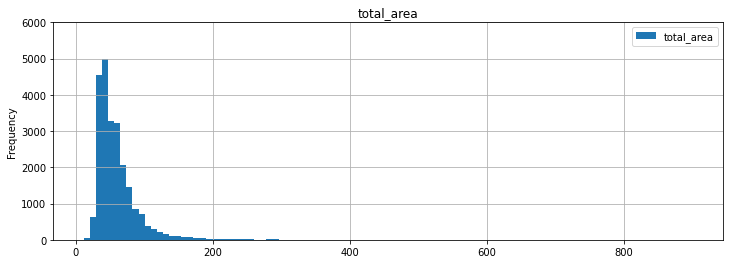

In [71]:

# Исследуем данные, построим графики.
# начнем с ислледования данных в столбце площадь.
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print (data['total_area'].describe())
data.plot (kind= 'hist', y='total_area', bins=100, figsize= (12,4), grid=True, title= 'total_area')
plt.ylim(0,6000)



<AxesSubplot:>

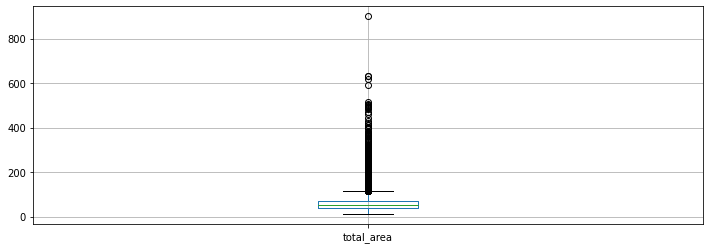

In [72]:
# построим график распределения
data.boxplot('total_area', figsize= (12, 4))



In [73]:
# отсечем значения выше верхнего "уса", то есть выше 120 и ниже первого квадриля.
data_area_filtered = data.query('total_area <= 120 & total_area >= 40')
display (data_area_filtered)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,<NA>,от 100 до 150 м2,120370,средний,другой,Thursday,March,2019,0,0
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,81,до 50 м2,82921,эконом +,первый,Tuesday,December,2018,0,0
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,558,от 50 до 100 м2,92786,эконом +,другой,Thursday,August,2015,1,0
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,121,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018,0,0
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,<NA>,от 50 до 100 м2,110545,эконом +,другой,Thursday,April,2019,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,73,2016-10-13,2,3,25,40,7,True,...,519,от 50 до 100 м2,129904,средний,другой,Thursday,October,2016,1,0
23693,9,4600000,62,2016-08-05,3,3,9,40,8,True,...,239,от 50 до 100 м2,73718,эконом,другой,Friday,August,2016,1,0
23695,14,3100000,59,2018-01-15,3,3,5,38,4,True,...,45,от 50 до 100 м2,52542,эконом,другой,Monday,January,2018,1,0
23696,18,2500000,57,2018-02-11,2,3,3,30,1,True,...,<NA>,от 50 до 100 м2,44092,эконом,первый,Sunday,February,2018,1,0


отфильтровали таблицу, убрав выбросы.


count     23565
mean      99406
std       50389
min         112
25%       76566
50%       95000
75%      114213
max     1907500
Name: square_meter_price, dtype: float64


<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

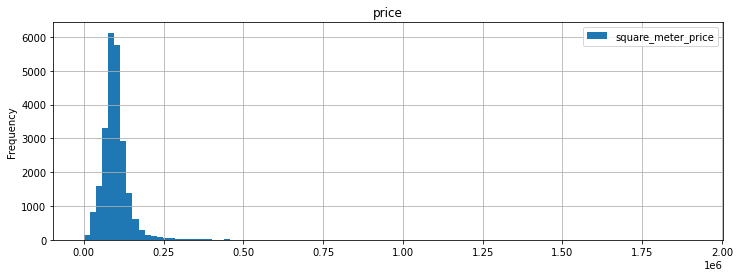

In [74]:
# теперь столбец цена за квадратный метр
print (data['square_meter_price'].describe())

data.plot (kind= 'hist', y='square_meter_price', bins=100, figsize= (12,4), grid=True, title= 'price')

<AxesSubplot:>

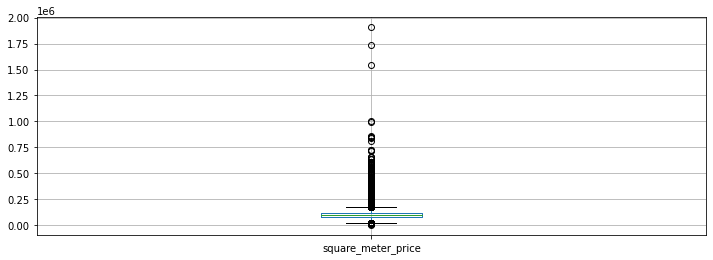

In [75]:
data.boxplot('square_meter_price', figsize= (12, 4))


In [76]:
data_price_filtered = data.query('square_meter_price <= 0.2')
display (data_price_filtered)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share


count   23565
mean        2
std         1
min         0
25%         1
50%         2
75%         3
max        19
Name: rooms, dtype: float64


(-100.0, 9000.0)

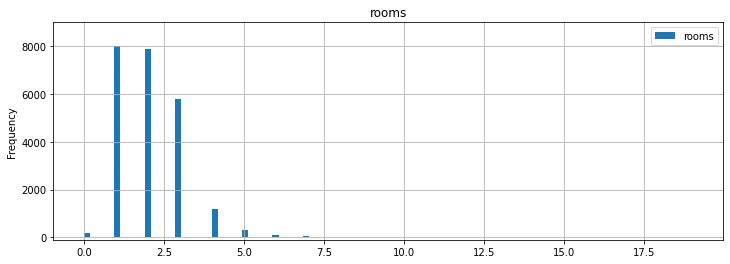

In [77]:
# теперь столбец по количеству комнат
print (data['rooms'].describe())
data.plot (kind= 'hist', y='rooms', bins=100, figsize= (12,4), grid=True, title= 'rooms')
plt.ylim(-100,9000)

In [1]:
# отфильтруем датасет по условиям 7+ комнат и 0 комнат
display(data.query('rooms >= 7'))
display(data.query('rooms < 1 & studio != True'))

NameError: name 'data' is not defined

Получили 90 квартир с комнатами 7+ и 59 квартир с 0 комнат, которые не студии. Посмотрим в чем причина появления 0 комнат у не студий, проверим параметр open_plan.

In [79]:
display(data.query('rooms <1 & studio != True and open_plan != True'))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share


Выяснили, что 0 комнат стоит либо в студиях, либо в квартирах свободной планировки.

<AxesSubplot:>

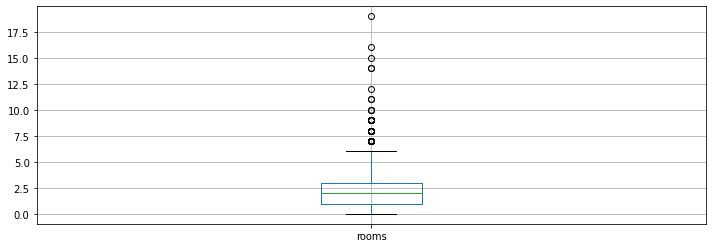

In [80]:
data.boxplot('rooms', figsize= (12, 4))

In [81]:
#отсечем значения,где комнат меньше 1 и больше 6
data_rooms_filtered = data.query('rooms <= 6 & rooms >= 1')
display (data_rooms_filtered)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,<NA>,от 100 до 150 м2,120370,средний,другой,Thursday,March,2019,0,0
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,81,до 50 м2,82921,эконом +,первый,Tuesday,December,2018,0,0
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,558,от 50 до 100 м2,92786,эконом +,другой,Thursday,August,2015,1,0
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,424,от 150 до 200 м2,408176,вип класс,другой,Friday,July,2015,1,0
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,121,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,134,2017-03-21,3,4,5,73,3,True,...,<NA>,от 100 до 150 м2,72491,эконом,другой,Tuesday,March,2017,1,0
23695,14,3100000,59,2018-01-15,3,3,5,38,4,True,...,45,от 50 до 100 м2,52542,эконом,другой,Monday,January,2018,1,0
23696,18,2500000,57,2018-02-11,2,3,3,30,1,True,...,<NA>,от 50 до 100 м2,44092,эконом,первый,Sunday,February,2018,1,0
23697,13,11475000,77,2017-03-28,2,3,17,40,12,True,...,602,от 50 до 100 м2,149511,средний,другой,Tuesday,March,2017,1,0


count   23564
mean        3
std         1
min         1
25%         3
50%         3
75%         3
max       100
Name: ceiling_height, dtype: float64


(-1.0, 100.0)

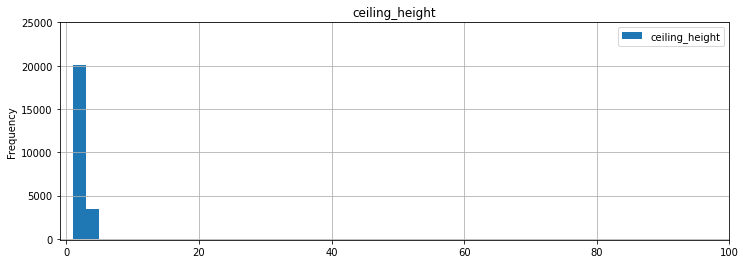

In [82]:
# теперь столбец по высоте потолков
print (data['ceiling_height'].describe())
data.plot (kind= 'hist', y='ceiling_height', bins=50, figsize= (12,4), grid=True, title= 'ceiling_height')
plt.ylim(-100,25000)
plt.xlim(-1,100)

<AxesSubplot:>

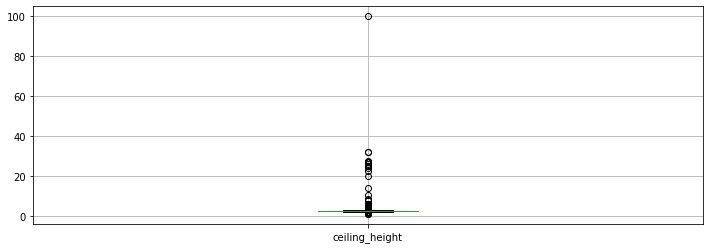

In [83]:
data.boxplot('ceiling_height', figsize= (12, 4))

In [84]:
# проанализируем нереальные значения высоты потолка
display(data.query('ceiling_height >= 3.5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share
154,1,8200000,80,2018-11-06,3,4,3,44,2,True,...,38,от 50 до 100 м2,102500,эконом +,другой,Tuesday,November,2018,1,0
155,8,96000000,317,2017-07-07,4,4,3,183,3,True,...,62,свыше 200 м2,302839,элитное,последний,Friday,July,2017,1,0
179,5,14800000,109,2019-04-11,3,4,5,72,5,True,...,<NA>,от 100 до 150 м2,136155,средний,последний,Thursday,April,2019,1,0
239,16,22000000,119,2017-02-16,3,4,5,56,3,False,...,77,от 100 до 150 м2,184874,бизнес,другой,Thursday,February,2017,0,0
263,12,39900000,141,2016-11-19,2,4,8,40,7,True,...,<NA>,от 100 до 150 м2,283784,элитное,другой,Saturday,November,2016,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23330,6,19900000,144,2017-01-09,3,4,5,80,3,True,...,<NA>,от 100 до 150 м2,138194,средний,другой,Monday,January,2017,1,0
23382,2,15000000,151,2016-07-04,4,4,4,98,3,True,...,455,от 150 до 200 м2,99404,эконом +,другой,Monday,July,2016,1,0
23399,16,15300000,97,2017-01-11,3,4,7,61,2,True,...,391,от 50 до 100 м2,157732,средний,другой,Wednesday,January,2017,1,0
23573,8,6290000,48,2019-03-20,1,4,12,14,12,True,...,19,до 50 м2,131949,средний,последний,Wednesday,March,2019,0,0


In [85]:
data_ceiling_filtered = data.query('ceiling_height <= 3.5 & ceiling_height >= 2.55')
display (data_ceiling_filtered)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,<NA>,от 100 до 150 м2,120370,средний,другой,Thursday,March,2019,0,0
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,81,до 50 м2,82921,эконом +,первый,Tuesday,December,2018,0,0
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,558,от 50 до 100 м2,92786,эконом +,другой,Thursday,August,2015,1,0
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,424,от 150 до 200 м2,408176,вип класс,другой,Friday,July,2015,1,0
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,121,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30,2017-07-07,1,3,5,18,4,True,...,413,до 50 м2,45000,эконом,другой,Friday,July,2017,1,0
23693,9,4600000,62,2016-08-05,3,3,9,40,8,True,...,239,от 50 до 100 м2,73718,эконом,другой,Friday,August,2016,1,0
23695,14,3100000,59,2018-01-15,3,3,5,38,4,True,...,45,от 50 до 100 м2,52542,эконом,другой,Monday,January,2018,1,0
23696,18,2500000,57,2018-02-11,2,3,3,30,1,True,...,<NA>,от 50 до 100 м2,44092,эконом,первый,Sunday,February,2018,1,0


count   20394
mean      181
std       220
min         1
25%        45
50%        95
75%       231
max      1580
Name: days_exposition, dtype: float64


(-100.0, 2500.0)

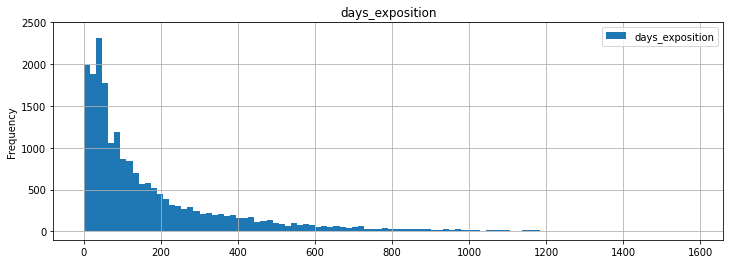

In [86]:
#Изучим Время продажи кваритры. Найдем среднее и медианное значение, чтобы определить "быструю продажу" и "долгую продажу"
print (data['days_exposition'].describe())
data['days_exposition'].round()
data.plot (kind= 'hist', y='days_exposition', bins=100, figsize= (12,4), grid=True, title= 'days_exposition')
plt.ylim(-100,2500)



<AxesSubplot:>

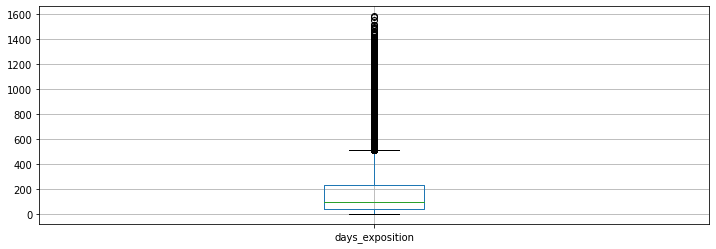

In [87]:
data.boxplot('days_exposition', figsize= (12, 4), grid=True)

Судя по гистограме и графику распределения, все значения выше 550 можно считать выбросами. Очень быстрой можно считать продажу раньше 45 дней (первый квадриль).


In [88]:
# сформируем новый датасет, применив фильтрацию по дням продажи. Отбросим слишком высокие значения.
data_days = data.query ('days_exposition <= 550')
display (data_days)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share
1,7,3350000,40,2018-12-04,1,3,11,19,1,True,...,81,до 50 м2,82921,эконом +,первый,Tuesday,December,2018,0,0
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,424,от 150 до 200 м2,408176,вип класс,другой,Friday,July,2015,1,0
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,121,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018,0,0
5,10,2890000,30,2018-09-10,1,3,12,14,5,True,...,55,до 50 м2,95066,эконом +,другой,Monday,September,2018,0,0
6,6,3700000,37,2017-11-02,1,3,26,11,6,True,...,155,до 50 м2,99196,эконом +,другой,Thursday,November,2017,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52,2018-07-19,2,3,5,31,2,True,...,15,от 50 до 100 м2,105769,эконом +,другой,Thursday,July,2018,1,0
23691,11,9470000,73,2016-10-13,2,3,25,40,7,True,...,519,от 50 до 100 м2,129904,средний,другой,Thursday,October,2016,1,0
23692,2,1350000,30,2017-07-07,1,3,5,18,4,True,...,413,до 50 м2,45000,эконом,другой,Friday,July,2017,1,0
23693,9,4600000,62,2016-08-05,3,3,9,40,8,True,...,239,от 50 до 100 м2,73718,эконом,другой,Friday,August,2016,1,0


0.6536213939252805


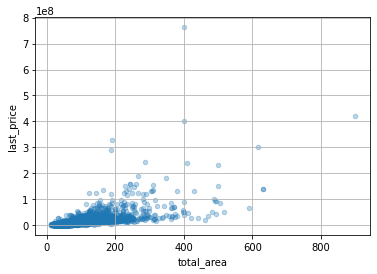

In [89]:
# Изучим влияние различных факторов на цену. Построим сводные таблицы.
# сначала корреляция цена/площадь
data.plot(x='total_area', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(data['last_price'].corr(data['total_area']))


из гистограммы видим, что средняя коэффициент корреляции 0,65. Это значит, что взаимосвязь есть, существенная.

0.36319054850657456


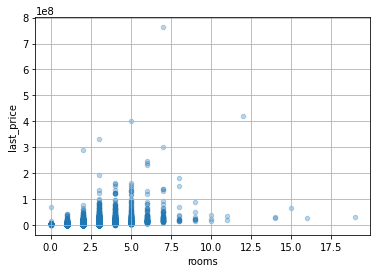

In [90]:
# теперь посмотрим на корреляцию цены/количество комнат

data.plot(x='rooms', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(data['last_price'].corr(data['rooms']))


Коэффициент корреляции в 0,36 говорит о наличии зависимости стоимости жилья от количества комнат, но не сильной.

-0.2057658245592697


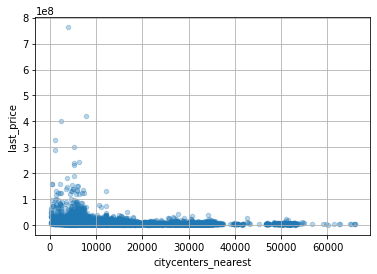

In [91]:
# исследуем зависимость цена/удаленность от центра
data.plot(x='citycenters_nearest', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(data['last_price'].corr(data['citycenters_nearest']))

Отрицательная корреляция говорит об обратной зависимости. По мере удаления от центра, стоимость падает.

In [92]:
# проанализируем зависимость цены от этажа. Так как это категориальная переменная, найдем медианные значения цены за м2 в каждой категории и сравним.
data.groupby('floor_category')['last_price'].median()   


floor_category
другой      4848500
первый      3900000
последний   4300000
Name: last_price, dtype: float64

Исходя из полученных значений видим, что на первом и последнем этаже стоимость существенно ниже.

In [93]:
# посмотрим зависимость стоимости жилья от дня недели публикации
weekday_price= data.groupby('weekday')['last_price'].mean()
weekday_price

weekday
Friday      6359714
Monday      6518332
Saturday    6986165
Sunday      6242137
Thursday    6706766
Tuesday     6389281
Wednesday   6630246
Name: last_price, dtype: float64

Видно, что у объявлений выложенных в субботу цена чуть выше, но сильной разницы не наблюдается, поэтому корреляция слабая, практически стремящаяся к 0 

In [94]:
#посмотрим на топ 10 городов по количеству публмкаций
top_10 = data.pivot_table (index= 'locality_name', values = 'last_price', aggfunc= 'count').sort_values('last_price', ascending=False).round().head(10)
display(top_10)

,last_price
locality_name,
Санкт-Петербург,15651
посёлок Мурино,520
посёлок Шушары,439
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


In [95]:
# найдем среднюю цену за кв.м. по городам.
top_10_mean= data[data['locality_name'].isin(top_10.index)].groupby('locality_name')['square_meter_price'].mean()
display(top_10_mean)

locality_name
Всеволожск           68654
Выборг               58142
Гатчина              68746
Колпино              75425
Пушкин              103126
Санкт-Петербург     114869
деревня Кудрово      92474
посёлок Мурино       85673
посёлок Парголово    90176
посёлок Шушары       78551
Name: square_meter_price, dtype: float64

In [96]:
# Определим зависимость цены от удаленности от центра в Санкт-Петербурге.
pd.set_option('mode.chained_assignment', None)
peter_data = data.query('locality_name == "Санкт-Петербург"')
peter_data['distance_to_center'] = peter_data['citycenters_nearest']/1000
peter_data['distance_to_center'] = peter_data['distance_to_center'].round(0).astype('int64')
display(peter_data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_category,square_meter_price,class_category,floor_category,weekday,month,year,area_share,kitchen_share,distance_to_center
0,20,13000000,108,2019-03-07,3,3,16,51,8,True,...,от 100 до 150 м2,120370,средний,другой,Thursday,March,2019,0,0,16
2,10,5196000,56,2015-08-20,2,3,5,34,4,True,...,от 50 до 100 м2,92786,эконом +,другой,Thursday,August,2015,1,0,14
3,0,64900000,159,2015-07-24,3,3,14,99,9,True,...,от 150 до 200 м2,408176,вип класс,другой,Friday,July,2015,1,0,7
4,2,10000000,100,2018-06-19,2,3,14,32,13,True,...,от 50 до 100 м2,100000,эконом +,другой,Tuesday,June,2018,0,0,8
7,5,7915000,72,2019-04-18,2,3,24,40,22,True,...,от 50 до 100 м2,110545,эконом +,другой,Thursday,April,2019,1,0,12
9,18,5400000,61,2017-02-26,3,2,9,44,7,True,...,от 50 до 100 м2,88525,эконом +,другой,Sunday,February,2017,1,0,15
10,5,5050000,40,2017-11-16,1,3,12,20,3,True,...,до 50 м2,127525,средний,другой,Thursday,November,2017,1,0,14
15,16,4650000,39,2017-11-18,1,3,14,20,5,True,...,до 50 м2,119231,эконом +,другой,Saturday,November,2017,1,0,14
16,11,6700000,82,2017-11-23,3,3,5,56,1,True,...,от 50 до 100 м2,81707,эконом +,первый,Thursday,November,2017,1,0,11
17,6,4180000,36,2016-09-09,1,3,17,16,7,True,...,до 50 м2,116111,эконом +,другой,Friday,September,2016,0,0,15


distance_to_center
0    245834
1    177005
2    157849
3    121508
4    133283
5    140454
6    151012
7    156177
8    125650
9    113159
10   112607
11   108382
12   109255
13   108099
14   104201
15   104231
16   100543
17    96970
18    96362
19    98658
20   103045
21    94470
22    91330
23    91829
24    85737
25    91531
26    87799
27   132116
28    81162
29    72953
Name: square_meter_price, dtype: float64


count       30
mean    116440
std      34936
min      72953
25%      94943
50%     106165
75%     130499
max     245834
Name: square_meter_price, dtype: float64

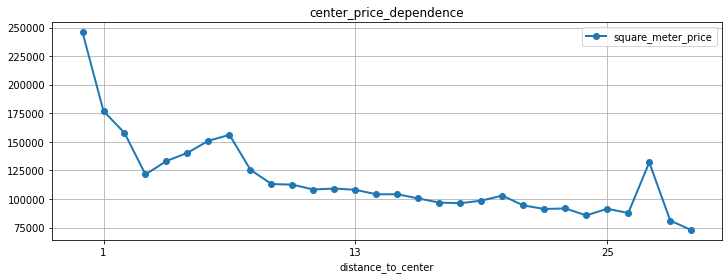

In [97]:
# найдем среднее значения стоимости м2 для каждого километра удаления от центра
peter_data_medians = peter_data.groupby('distance_to_center')['square_meter_price'].mean()
peter_data_medians.plot (x='distance_to_center', y='square_meter_price', style= 'o-', figsize= (12,4),
                         linewidth=2, grid=True, legend=True, title= 'center_price_dependence',
                         xticks=[0 + i for i in range(1,29,12)])
print(peter_data_medians)
peter_data_medians.describe()

из графика видим резкое снижение цены за м2 после 7 км. Очертим радиус центра в 7 км

total_area
12      2400000
13      2825000
13      1686000
16      2450000
16      2100000
         ...   
517    50000000
590    65000000
618   300000000
631   140000000
631   140000000
Name: last_price, Length: 1157, dtype: float64
0.6136073192218386


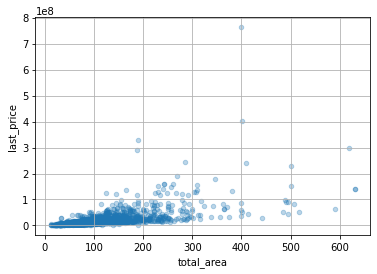

In [98]:
# создадим новый датафрейм и проанализируем зависимость цены от различных факторов в центре Санкт-Петербурга
peter_data_center = peter_data.query('distance_to_center <= 7')

# изучим зависимость цены от площади.
peter_center_area = peter_data_center.groupby('total_area')['last_price'].median()
print(peter_center_area)
peter_data_center.plot(x='total_area', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(peter_data_center['last_price'].corr(peter_data_center['total_area']))

Исходя из графика и коэффициента корреляции 0,631 (существенная) можно сделать вывод,что площадь квартиры влияет на стоимость.

ceiling_height
2      8500000
2      6600000
2      7100000
2      6800000
2      5705000
        ...   
6     59800000
6      8200000
6    119000000
27     8000000
32     9999000
Name: last_price, Length: 151, dtype: float64
0.07210321209933622


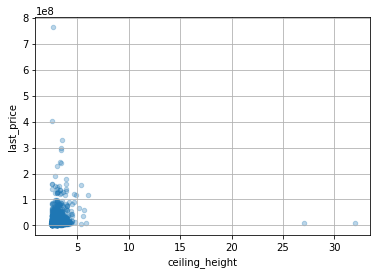

In [99]:
# теперь посмотрим на высоту потолков
peter_center_ceiling = peter_data_center.groupby('ceiling_height')['last_price'].median()
print(peter_center_ceiling)
peter_data_center.plot(x='ceiling_height', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(peter_data_center['last_price'].corr(peter_data_center['ceiling_height']))

Исходя из графика и коэффициента корреляции 0,07 (очень слабая) можно сделать вывод,что высота потолка не влияет на стоимость.

rooms
0     5050000
1     6000000
2     7703451
3     9997000
4    12100000
5    14945000
6    19500000
7    24900000
8    21045000
9    29000000
10   27750000
11   25250000
14   28659000
15   65000000
16   28500000
19   32250000
Name: last_price, dtype: float64
0.31480770302134886


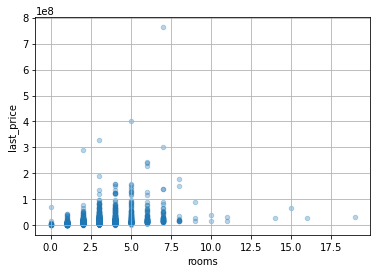

In [101]:
# теперь посмотрим на зависимость от числа комнат
peter_center_rooms = peter_data_center.groupby('rooms')['last_price'].median()
print(peter_center_rooms)
peter_data_center.plot(x='rooms', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(peter_data_center['last_price'].corr(peter_data_center['rooms']))

зависимость стоимости кваритры от числа комнат есть, но не ярковыраженная. Коэффициент корреляции 0,31 (слабая)

ceiling_height
2      8500000
2      6600000
2      7100000
2      6800000
2      5705000
        ...   
6     59800000
6      8200000
6    119000000
27     8000000
32     9999000
Name: last_price, Length: 151, dtype: float64


<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

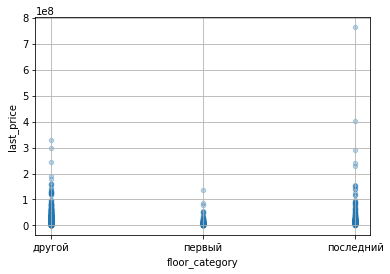

In [102]:
# теперь посмотрим на зависимость от этажа
peter_center_floor= peter_data_center.groupby('floor_category')['last_price'].median()
print(peter_center_ceiling)
peter_data_center.plot(x='floor_category', y='last_price', kind='scatter', alpha= 0.3, grid=True)


Из графика видно, что на првых этажах недвижимость чуть дешевле, хотя сильной зависимости от категории (первый/последний/другой) нет. Коэффициент корреляции определить не можем, так как этажность - категорийная переменная

distance_to_center
0   17900000
1   11395000
2   10000000
3    8409000
4    9200000
5    9490000
6    8900000
7    7800000
Name: last_price, dtype: float64
-0.040815066753156166


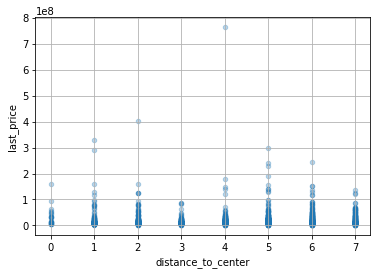

In [103]:
# теперь посмотрим на зависимость от числа комнат
peter_center_distance = peter_data_center.groupby('distance_to_center')['last_price'].median()
print(peter_center_distance)
peter_data_center.plot(x='distance_to_center', y='last_price', kind='scatter', alpha= 0.3, grid=True)
print(peter_data_center['last_price'].corr(peter_data_center['distance_to_center']))

## ОБЩИЕ ВЫВОДЫ.
Наибольшее влияние на стоимость квартиры имеет параметр - общая площадь. Коэффициент корреляции составляет 0,631, что довольно существенно. Следующий по значимости параметр - количество комнат с коэффициентом корреляции 0,31. Такие параметры, как высота потолка и удаленность от центра практически не влияют на стоимость. 
По фонду недвижимости в целом наблюдается несколько иная картина. Коэффициент корреляции между стоимостью и количеством комнат намного меньше (0,03), чем в центре. Самый значимый параметр для города_ удаленность от центра и общая площадь
